In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import timeit
import copy

In [2]:
pd.set_option('display.max_columns',192)
pd.set_option('display.max_rows',192)
pd.set_option('display.max_colwidth',-1)


In [3]:
# Seaborn setting                                                                                                                                              
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=1)                                                  
plt.figure(figsize=(3.1, 3)) # Two column paper. Each column is about 3.15 inch wide.                                                                                                                                                                                                                                 
color = sns.color_palette("Set2", 6)


<Figure size 223.2x216 with 0 Axes>

In [4]:
import sys
print("System version:", sys.version)
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)

System version: 3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]
Pandas version: 0.24.2
NumPy version: 1.16.4


## Quick Sort

In [5]:
def quicksort(A):
    _quicksort1(A, 0, len(A) - 1)
    return A

def partition(A, p, r):
    x = A[r]
    i = p - 1
    for j in range(p, r):
        if A[j] <= x:
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i + 1], A[r] =  A[r], A[i + 1]
    return i + 1

def _quicksort1(A, p, r):
    if p < r:
        q = partition(A, p, r)
        _quicksort1(A, p, q - 1)
        _quicksort1(A, q + 1, r)


## Benchmarking

In [6]:
np.random.seed(12345)
benchmark_results_quick = pd.DataFrame(columns =['input ordering','input size','run number','sorting algorithm','time'])

In [7]:

for input_ordering in ['random','identical']:
    
    for input_size in range(1,7):
        
        test_data = np.random.random((10**input_size,))
        
        if input_ordering == 'identical':
            test_data =  [test_data]*0
            
        clock = timeit.Timer(stmt='sort_func(copy(data))',
                     globals={'sort_func': quicksort,
                              'data': test_data,
                              'copy': copy.copy})
        n_ar, t_ar = clock.autorange()
        t = clock.repeat(repeat=5, number=n_ar)  
        
        print(f"Quick sort minimum time on {input_ordering} data of size 10^{input_size}:", min(t)/n_ar)
        
        
        for run_number in range(5):
            benchmark_results_quick = benchmark_results_quick.append({'input ordering': input_ordering,
                                                          
                                                         'input size':10**input_size,
                                                          'run number':run_number+1,
                                                          'sorting algorithm':'Quicksort',
                                                          'time':t[run_number]/n_ar},
                                                             ignore_index=True)
        

Quick sort minimum time on random data of size 10^1: 2.3113759999999982e-05
Quick sort minimum time on random data of size 10^2: 0.0002982296
Quick sort minimum time on random data of size 10^3: 0.00529729200000002
Quick sort minimum time on random data of size 10^4: 0.0681512399999999
Quick sort minimum time on random data of size 10^5: 0.8451331
Quick sort minimum time on random data of size 10^6: 10.204800899999995
Quick sort minimum time on identical data of size 10^1: 4.913817999999992e-07
Quick sort minimum time on identical data of size 10^2: 4.925107999999909e-07
Quick sort minimum time on identical data of size 10^3: 4.91861599999993e-07
Quick sort minimum time on identical data of size 10^4: 4.918381999999895e-07
Quick sort minimum time on identical data of size 10^5: 4.933243999999774e-07
Quick sort minimum time on identical data of size 10^6: 4.922081999999932e-07


In [8]:
benchmark_results_quick.to_pickle("./benchmark_results_quick.pkl")

In [9]:
pd.read_pickle("./benchmark_results_quick.pkl")

,input ordering,input size,run number,sorting algorithm,time
0,random,10,1,Quicksort,2.311376e-05
1,random,10,2,Quicksort,2.325351e-05
2,random,10,3,Quicksort,3.019751e-05
3,random,10,4,Quicksort,2.607721e-05
4,random,10,5,Quicksort,2.655673e-05
5,random,100,1,Quicksort,3.111236e-04
6,random,100,2,Quicksort,2.982296e-04
7,random,100,3,Quicksort,3.167737e-04
8,random,100,4,Quicksort,4.109026e-04
9,random,100,5,Quicksort,3.381681e-04


Text(0.5, 1.0, 'Quick Sort')

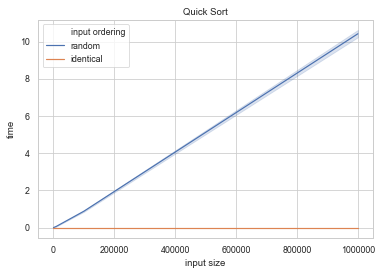

In [44]:
ax = sns.lineplot(x="input size", y="time", data=benchmark_results_quick, hue ='input ordering')
plt.title('Quick Sort')

## Heap Sort

In [11]:
# Python program for implementation of heap Sort 
  
# To heapify subtree rooted at index i. 
# n is size of heap 
def heapify(arr, n, i): 
    largest = i  # Initialize largest as root 
    l = 2 * i + 1     # left = 2*i + 1 
    r = 2 * i + 2     # right = 2*i + 2 
  
    # See if left child of root exists and is 
    # greater than root 
    if l < n and arr[i] < arr[l]: 
        largest = l 
  
    # See if right child of root exists and is 
    # greater than root 
    if r < n and arr[largest] < arr[r]: 
        largest = r 
  
    # Change root, if needed 
    if largest != i: 
        arr[i],arr[largest] = arr[largest],arr[i]  # swap 
  
        # Heapify the root. 
        heapify(arr, n, largest) 
        
## main function to sort given array       
def sort_heap(arr): 
    n = len(arr) 
  
    # Build a maxheap. 
    for i in range(n, -1, -1): 
        heapify(arr, n, i) 
  
    # One by one extract elements 
    for i in range(n-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i]   # swap 
        heapify(arr, i, 0) 
        
    return arr

 ## Benchmarking

In [12]:
np.random.seed(12345)
benchmark_results_heap = pd.DataFrame(columns =['input ordering','input size','run number','sorting algorithm','time'])

In [13]:

for input_ordering in ['sorted','reversed','random','identical']:
    
    for input_size in range(1,7):
        
        test_data = np.random.random((10**input_size,))
        
        if input_ordering == 'sorted':
            test_data = sorted(test_data)
        
        elif input_ordering == 'reversed':
            test_data = list(reversed(sorted(test_data)))
        
        elif input_ordering == 'identical':
            test_data =  [test_data]*0
            
        clock = timeit.Timer(stmt='sort_func(copy(data))',
                     globals={'sort_func': sort_heap,
                              'data': test_data,
                              'copy': copy.copy})
        n_ar, t_ar = clock.autorange()
        t = clock.repeat(repeat=5, number=n_ar)  
        
        print(f"Heap sort minimum time on {input_ordering} data of size 10^{input_size}:", min(t)/n_ar)
       
        for run_number in range(5):
            benchmark_results_heap = benchmark_results_heap.append({'input ordering': input_ordering,
                                                          
                                                         'input size':10**input_size,
                                                          'run number':run_number+1,
                                                          'sorting algorithm':'Heap Sort',
                                                          'time':t[run_number]/n_ar},
                                                        ignore_index=True)
        

Heap sort minimum time on sorted data of size 10^1: 1.624090000000038e-05
Heap sort minimum time on sorted data of size 10^2: 0.0002942580999999933
Heap sort minimum time on sorted data of size 10^3: 0.004573850000000164
Heap sort minimum time on sorted data of size 10^4: 0.06308145999999795
Heap sort minimum time on sorted data of size 10^5: 0.7867832000000021
Heap sort minimum time on sorted data of size 10^6: 9.862466499999996
Heap sort minimum time on reversed data of size 10^1: 1.2941245000000378e-05
Heap sort minimum time on reversed data of size 10^2: 0.00025846690000000193
Heap sort minimum time on reversed data of size 10^3: 0.004161968000000229
Heap sort minimum time on reversed data of size 10^4: 0.0610732999999982
Heap sort minimum time on reversed data of size 10^5: 0.7354646000000002
Heap sort minimum time on reversed data of size 10^6: 9.474967499999991
Heap sort minimum time on random data of size 10^1: 3.5902009999998086e-05
Heap sort minimum time on random data of siz

In [14]:
benchmark_results_heap.to_pickle("./benchmark_results_heap.pkl")

In [15]:
pd.read_pickle("./benchmark_results_heap.pkl")

,input ordering,input size,run number,sorting algorithm,time
0,sorted,10,1,Heap Sort,0.000016
1,sorted,10,2,Heap Sort,0.000016
2,sorted,10,3,Heap Sort,0.000017
3,sorted,10,4,Heap Sort,0.000016
4,sorted,10,5,Heap Sort,0.000016
5,sorted,100,1,Heap Sort,0.000295
6,sorted,100,2,Heap Sort,0.000294
7,sorted,100,3,Heap Sort,0.000304
8,sorted,100,4,Heap Sort,0.000294
9,sorted,100,5,Heap Sort,0.000296


Text(0.5, 1.0, 'Heap Sort')

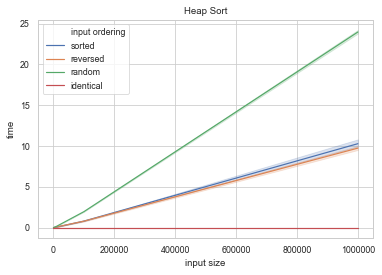

In [45]:
ax = sns.lineplot(x="input size", y="time", data=benchmark_results_heap, hue ='input ordering')
plt.title('Heap Sort')

## Merge Sort

In [17]:
def merge_sort(data):
   
    if len(data) > 1:
        
        mid = int(len(data)/2)
        lefthalf = data[:mid]
        righthalf = data[mid:]
        
        merge_sort(lefthalf)
        merge_sort(righthalf)
        
        i=0
        j=0
        k=0
        
        while i<len(lefthalf) and j<len(righthalf):
            
            if lefthalf[i]<righthalf[j]:
                data[k] = lefthalf[i]
                
                i+=1
                
            else:
                data[k]= righthalf[j]
                j+=1
                
            k+=1
            
        while i<len(lefthalf):
            data[k] = lefthalf[i]
            i+=1
            k+=1
            
        while j<len(righthalf):
            data[k] = righthalf[j]
            j= j+1
            k= k+1
            
        return data
            
            

In [18]:
np.random.seed(12345)
benchmark_results_merge = pd.DataFrame(columns =['input ordering','input size','run number','sorting algorithm','time'])

In [19]:

for input_ordering in ['sorted','reversed','random','identical']:
    
    for input_size in range(1,7):
        
        test_data = np.random.random((10**input_size,))
        
        if input_ordering == 'sorted':
            test_data = sorted(test_data)
        
        elif input_ordering == 'reversed':
            test_data = list(reversed(sorted(test_data)))
        
        elif input_ordering == 'identical':
            test_data =  [test_data]*0
            
        clock = timeit.Timer(stmt='sort_func(copy(data))',
                     globals={'sort_func': merge_sort,
                              'data': test_data,
                              'copy': copy.copy})
        n_ar, t_ar = clock.autorange()
        t = clock.repeat(repeat=5, number=n_ar)  
        
        print(f"Merge Sort minimum time on {input_ordering} data of size 10^{input_size}:", min(t)/n_ar)
        
        
        for run_number in range(5):
            benchmark_results_merge = benchmark_results_merge.append({'input ordering': input_ordering,
                                                          
                                                         'input size':10**input_size,
                                                          'run number':run_number+1,
                                                          'sorting algorithm':'Merge Sort',
                                                          'time':t[run_number]/n_ar},
                                                        ignore_index=True)
        

Merge Sort minimum time on sorted data of size 10^1: 1.882860999999707e-05
Merge Sort minimum time on sorted data of size 10^2: 0.000289662999999905
Merge Sort minimum time on sorted data of size 10^3: 0.00396894599999996
Merge Sort minimum time on sorted data of size 10^4: 0.038537680000001726
Merge Sort minimum time on sorted data of size 10^5: 0.5910025999999675
Merge Sort minimum time on sorted data of size 10^6: 6.46002139999996
Merge Sort minimum time on reversed data of size 10^1: 1.6636909999999716e-05
Merge Sort minimum time on reversed data of size 10^2: 0.00023509059999997817
Merge Sort minimum time on reversed data of size 10^3: 0.003026775999999813
Merge Sort minimum time on reversed data of size 10^4: 0.039374420000001464
Merge Sort minimum time on reversed data of size 10^5: 0.4846225000000004
Merge Sort minimum time on reversed data of size 10^6: 6.752326100000005
Merge Sort minimum time on random data of size 10^1: 2.8510339999991174e-05
Merge Sort minimum time on rand

In [20]:
benchmark_results_merge.to_pickle("./benchmark_results_merge.pkl")

In [21]:
pd.read_pickle("./benchmark_results_merge.pkl")

,input ordering,input size,run number,sorting algorithm,time
0,sorted,10,1,Merge Sort,2.131137e-05
1,sorted,10,2,Merge Sort,2.023268e-05
2,sorted,10,3,Merge Sort,2.179702e-05
3,sorted,10,4,Merge Sort,2.036287e-05
4,sorted,10,5,Merge Sort,1.882861e-05
5,sorted,100,1,Merge Sort,4.472022e-04
6,sorted,100,2,Merge Sort,4.470870e-04
7,sorted,100,3,Merge Sort,3.704500e-04
8,sorted,100,4,Merge Sort,3.344388e-04
9,sorted,100,5,Merge Sort,2.896630e-04


Text(0.5, 1.0, 'Merge Sort')

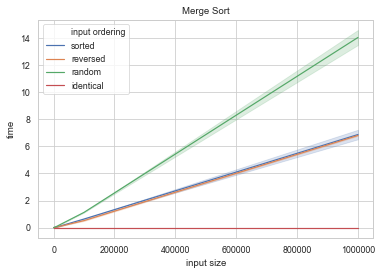

In [46]:
ax = sns.lineplot(x="input size", y="time", data=benchmark_results_merge, hue ='input ordering')
plt.title('Merge Sort')

### Benchmarking of python sort function

In [23]:
np.random.seed(12345)
benchmark_results_python = pd.DataFrame(columns =['input ordering','input size','run number','sorting algorithm','time'])

In [24]:

for input_ordering in ['sorted','reversed','random','identical']:
    
    for input_size in range(1,7):
        
        test_data = np.random.random((10**input_size,))
        
        if input_ordering == 'sorted':
            test_data = sorted(test_data)
        
        elif input_ordering == 'reversed':
            test_data = list(reversed(sorted(test_data)))
        
        elif input_ordering == 'identical':
            test_data =  [test_data]*0
            
        clock = timeit.Timer(stmt='sort_func(copy(data))',
                     globals={'sort_func': sorted,
                              'data': test_data,
                              'copy': copy.copy})
        n_ar, t_ar = clock.autorange()
        t = clock.repeat(repeat=5, number=n_ar)  
        
        print(f"Python sort function minimum time on {input_ordering} data of size 10^{input_size}:", min(t)/n_ar)
        
        for run_number in range(5):
            benchmark_results_python = benchmark_results_python.append({'input ordering': input_ordering,
                                                          
                                                         'input size':10**input_size,
                                                          'run number':run_number+1,
                                                          'sorting algorithm':'Python Sort',
                                                          'time':t[run_number]/n_ar},
                                                             ignore_index=True)
        

Python sort function minimum time on sorted data of size 10^1: 6.806204000001799e-07
Python sort function minimum time on sorted data of size 10^2: 2.9619960000002267e-06
Python sort function minimum time on sorted data of size 10^3: 2.3788260000003447e-05
Python sort function minimum time on sorted data of size 10^4: 0.00025349459999995363
Python sort function minimum time on sorted data of size 10^5: 0.002933219999999892
Python sort function minimum time on sorted data of size 10^6: 0.12694790000000467
Python sort function minimum time on reversed data of size 10^1: 7.902692000000116e-07
Python sort function minimum time on reversed data of size 10^2: 3.0991370000003825e-06
Python sort function minimum time on reversed data of size 10^3: 2.323677999999063e-05
Python sort function minimum time on reversed data of size 10^4: 0.0002488362999999936
Python sort function minimum time on reversed data of size 10^5: 0.002960223999999698
Python sort function minimum time on reversed data of s

In [25]:
benchmark_results_python.to_pickle("./benchmark_results_python.pkl")

In [26]:
pd.read_pickle("./benchmark_results_python.pkl")

,input ordering,input size,run number,sorting algorithm,time
0,sorted,10,1,Python Sort,7.735940e-07
1,sorted,10,2,Python Sort,7.129910e-07
2,sorted,10,3,Python Sort,6.806204e-07
3,sorted,10,4,Python Sort,6.813988e-07
4,sorted,10,5,Python Sort,6.839950e-07
5,sorted,100,1,Python Sort,3.178622e-06
6,sorted,100,2,Python Sort,3.327099e-06
7,sorted,100,3,Python Sort,2.977926e-06
8,sorted,100,4,Python Sort,2.961996e-06
9,sorted,100,5,Python Sort,2.971586e-06


Text(0.5, 1.0, 'Python Sort')

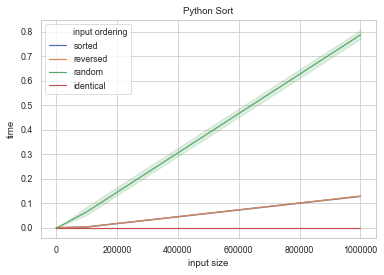

In [47]:
ax = sns.lineplot(x="input size", y="time", data=benchmark_results_python, hue ='input ordering')
plt.title("Python Sort")   

## Numpy Sort

In [28]:
def numpy_sort(data):
    return np.sort(data)

In [29]:
np.random.seed(12345)
benchmark_results_numpy = pd.DataFrame(columns =['input ordering','input size', 'sorting algorithm','time'])

In [30]:
list_min_times = []

for input_ordering in ['sorted','reversed','random','identical']:
    
    for input_size in range(1,7):
        
        test_data = np.random.random((10**input_size,))
        
        if input_ordering == 'sorted':
            test_data = sorted(test_data)
        
        elif input_ordering == 'reversed':
            test_data = list(reversed(sorted(test_data)))
        
        elif input_ordering == 'identical':
            test_data =  [test_data]*0
            
        clock = timeit.Timer(stmt='sort_func(copy(data))',
                     globals={'sort_func': numpy_sort,
                              'data': test_data,
                              'copy': copy.copy})
        n_ar, t_ar = clock.autorange()
        t = clock.repeat(repeat=5, number=n_ar)
        min_time = min(t)/n_ar
        list_min_times.append(min_time)
        
        print(f"Numpy sort function minimum time on {input_ordering} data of size 10^{input_size}:", min_time)
        
        benchmark_results_numpy = benchmark_results_numpy.append({'input ordering': input_ordering,
                                                     'input size':10**input_size,
                                                      'sorting algorithm':'NumPy-sort',
                                                      'time':min_time},
                                                         ignore_index=True)


Numpy sort function minimum time on sorted data of size 10^1: 4.163238000001002e-06
Numpy sort function minimum time on sorted data of size 10^2: 1.028711999999814e-05
Numpy sort function minimum time on sorted data of size 10^3: 6.983788000000004e-05
Numpy sort function minimum time on sorted data of size 10^4: 0.0007038668000000143
Numpy sort function minimum time on sorted data of size 10^5: 0.008105506000001697
Numpy sort function minimum time on sorted data of size 10^6: 0.24740929999995842
Numpy sort function minimum time on reversed data of size 10^1: 4.187534000000141e-06
Numpy sort function minimum time on reversed data of size 10^2: 1.0370115000000624e-05
Numpy sort function minimum time on reversed data of size 10^3: 7.262622000000647e-05
Numpy sort function minimum time on reversed data of size 10^4: 0.0007373256000000765
Numpy sort function minimum time on reversed data of size 10^5: 0.008626330000001872
Numpy sort function minimum time on reversed data of size 10^6: 0.270

In [31]:
benchmark_results_numpy.to_pickle("./benchmark_results_numpy.pkl")

In [32]:
pd.read_pickle("./benchmark_results_numpy.pkl")

,input ordering,input size,sorting algorithm,time
0,sorted,10,NumPy-sort,0.000004
1,sorted,100,NumPy-sort,0.000010
2,sorted,1000,NumPy-sort,0.000070
3,sorted,10000,NumPy-sort,0.000704
4,sorted,100000,NumPy-sort,0.008106
5,sorted,1000000,NumPy-sort,0.247409
6,reversed,10,NumPy-sort,0.000004
7,reversed,100,NumPy-sort,0.000010
8,reversed,1000,NumPy-sort,0.000073
9,reversed,10000,NumPy-sort,0.000737


Text(0.5, 1.0, 'Numpy Sort')

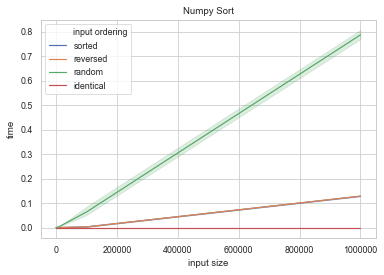

In [48]:
ax = sns.lineplot(x="input size", y="time", data=benchmark_results_python, hue ='input ordering')
plt.title('Numpy Sort')

# Combined Dataframe

In [34]:
frames = [ benchmark_results_heap, benchmark_results_merge, benchmark_results_numpy, benchmark_results_python, benchmark_results_quick]

In [35]:
combined = pd.concat(frames, axis =0)

C:\Users\Ashesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [36]:
combined

,input ordering,input size,run number,sorting algorithm,time
0,sorted,10,1,Heap Sort,1.625216e-05
1,sorted,10,2,Heap Sort,1.633665e-05
2,sorted,10,3,Heap Sort,1.668393e-05
3,sorted,10,4,Heap Sort,1.624687e-05
4,sorted,10,5,Heap Sort,1.624090e-05
5,sorted,100,1,Heap Sort,2.946800e-04
6,sorted,100,2,Heap Sort,2.943698e-04
7,sorted,100,3,Heap Sort,3.036297e-04
8,sorted,100,4,Heap Sort,2.942581e-04
9,sorted,100,5,Heap Sort,2.956943e-04


# Plot for Sorted Data

In [37]:
df_sorted = combined[combined['input ordering'] == 'sorted']

In [38]:
df_sorted

,input ordering,input size,run number,sorting algorithm,time
0,sorted,10,1,Heap Sort,1.625216e-05
1,sorted,10,2,Heap Sort,1.633665e-05
2,sorted,10,3,Heap Sort,1.668393e-05
3,sorted,10,4,Heap Sort,1.624687e-05
4,sorted,10,5,Heap Sort,1.624090e-05
5,sorted,100,1,Heap Sort,2.946800e-04
6,sorted,100,2,Heap Sort,2.943698e-04
7,sorted,100,3,Heap Sort,3.036297e-04
8,sorted,100,4,Heap Sort,2.942581e-04
9,sorted,100,5,Heap Sort,2.956943e-04


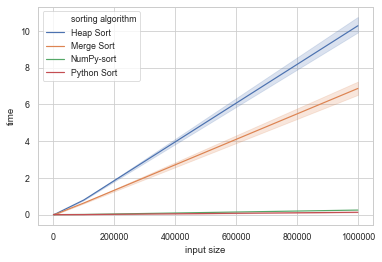

In [39]:
sns.lineplot(x='input size', y='time', hue='sorting algorithm', data=df_sorted)
plt.title('Sorted Data')


## Plot for reversed data

Text(0.5, 1.0, 'Reversed Data')

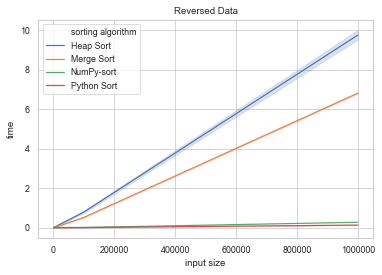

In [49]:
df_reversed = combined[combined['input ordering'] == 'reversed']
sns.lineplot(x='input size', y='time', hue='sorting algorithm', data=df_reversed)
plt.title('Reversed Data')

## Plot for random data

Text(0.5, 1.0, 'Random Data')

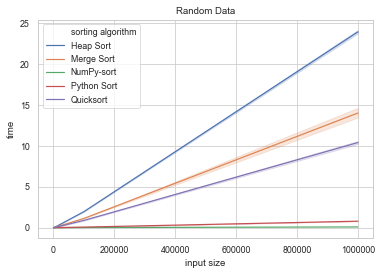

In [50]:
df_random = combined[combined['input ordering'] == 'random']
sns.lineplot(x='input size', y='time', hue='sorting algorithm', data=df_random)
plt.title("Random Data")

## Plot for Identical data

Text(0.5, 1.0, 'Identical Data')

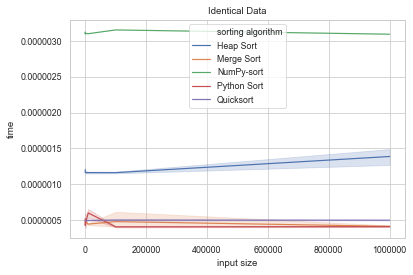

In [51]:
df_identical = combined[combined['input ordering'] == 'identical']
sns.lineplot(x='input size', y='time', hue='sorting algorithm', data=df_identical)
plt.title("Identical Data")